In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from scipy import stats

In [202]:
pd.options.display.float_format = '{:,.2f}'.format

In [671]:
data = pd.read_csv('Results of sims/Sims/200614_offload_alldata.csv', index_col = 0)

In [672]:
data['Offload'] = data['Offload'].replace('0.25', 0.25)

In [673]:
data['Offload'] = pd.Categorical(data['Offload'])
data['Offload'] = data['Offload'].cat.set_categories(['Control', 0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], ordered=True)

In [674]:
data.shape

(230000, 44)

In [675]:
data.groupby(['Staffing', 'Offload']).size()

Staffing  Offload
10-20-9   Control    10000
          0          10000
          0.05       10000
          0.1        10000
          0.15       10000
          0.2        10000
          0.25       10000
          0.3        10000
10-21-9   Control    10000
          0          10000
          0.05       10000
          0.1        10000
          0.15       10000
          0.2        10000
          0.25       10000
          0.3        10000
10-22-9   Control    10000
          0          10000
          0.05       10000
          0.1        10000
          0.15       10000
          0.2        10000
          0.25       10000
dtype: int64

In [676]:
cols_groupby = ['Mean_flowstaff_utilization', 'Mean_flowstaff_waiting', 'Total_wait_time']

In [677]:
data.groupby(['Offload', 'Staffing'])[cols_groupby].quantile([0.05, 0.5, 0.95])

Mean_flowstaff_utilization  Mean_flowstaff_waiting  \
Offload Staffing                                                            
Control 10-20-9  0.05                         nan                     nan   
                 0.50                         nan                     nan   
                 0.95                         nan                     nan   
        10-21-9  0.05                         nan                     nan   
                 0.50                         nan                     nan   
                 0.95                         nan                     nan   
        10-22-9  0.05                         nan                     nan   
                 0.50                         nan                     nan   
                 0.95                         nan                     nan   
0       10-20-9  0.05                       13.72                    0.23   
                 0.50                       14.34                    0.24   
                 0.95                       14.92                    0.26   
        10-21-9  0.05                       13.78                    0.23   
                 0.50                       14.40                    0.25   
                 0.95                       15.01                    0.26   
        10-22-9  0.05                       13.78                    0.23   
                 0.50                       14.43                    0.25   
                 0.95                       15.06                    0.26   
0.05    10-20-9  0.05                       13.80                    0.23   
                 0.50                       14.44                    0.25   
                 0.95                       15.04                    0.26   
        10-21-9  0.05                       13.86                    0.24   
                 0.50                       14.51                    0.25   
                 0.95                       15.12                    0.26   
        10-22-9  0.05                       13.91                    0.24   
                 0.50                       14.55                    0.25   
                 0.95                       15.16                    0.26   
0.1     10-20-9  0.05                       13.89                    0.24   
                 0.50                       14.55                    0.25   
                 0.95                       15.17                    0.26   
...                                           ...                     ...   
0.15    10-21-9  0.05                       14.04                    0.24   
                 0.50                       14.74                    0.25   
                 0.95                       15.39                    0.26   
        10-22-9  0.05                       14.09                    0.24   
                 0.50                       14.81                    0.25   
                 0.95                       15.47                    0.26   
0.2     10-20-9  0.05                       13.99                    0.24   
                 0.50                       14.69                    0.25   
                 0.95                       15.32                    0.26   
        10-21-9  0.05                       14.07                    0.24   
                 0.50                       14.80                    0.25   
                 0.95                       15.46                    0.26   
        10-22-9  0.05                       14.11                    0.24   
                 0.50                       14.86                    0.25   
                 0.95                       15.56                    0.26   
0.25    10-20-9  0.05                       14.00                    0.24   
                 0.50                       14.74                    0.25   
                 0.95                       15.38                    0.26   
        10-21-9  0.05                       14.10                    0.24   
                 0.

In [678]:
fs_steps = ['Mean_wait_time_refine_complaint', 'Mean_serve_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_serve_time_exam', 'Mean_serve_time_exam_flow_staff', 'Mean_wait_time_follow_up', 'Mean_serve_time_follow_up']

In [679]:
data.groupby(['Offload', 'Staffing'])[fs_steps].mean()

Mean_wait_time_refine_complaint  \
Offload Staffing                                    
Control 10-20-9                              0.00   
        10-21-9                              0.00   
        10-22-9                              0.00   
0       10-20-9                              5.55   
        10-21-9                              3.84   
        10-22-9                              2.56   
0.05    10-20-9                              4.83   
        10-21-9                              3.15   
        10-22-9                              1.99   
0.1     10-20-9                              3.92   
        10-21-9                              2.32   
        10-22-9                              1.33   
0.15    10-20-9                              3.32   
        10-21-9                              1.79   
        10-22-9                              0.91   
0.2     10-20-9                              2.87   
        10-21-9                              1.46   
        10-22-9                              0.68   
0.25    10-20-9                              2.64   
        10-21-9                              1.27   
        10-22-9                              0.55   
0.3     10-20-9                              2.49   
        10-21-9                              1.13   
        10-22-9                               nan   

                  Mean_serve_time_refine_complaint  Mean_wait_time_exam  \
Offload Staffing                                                          
Control 10-20-9                              24.67                 9.04   
        10-21-9                              24.67                 8.88   
        10-22-9                              24.66                 8.89   
0       10-20-9                              24.50                 4.56   
        10-21-9                              24.54                 5.61   
        10-22-9                              24.56                 6.53   
0.05    10-20-9                              24.50                 3.65   
        10-21-9                              24.54                 4.48   
        10-22-9                              24.57                 5.24   
0.1     10-20-9                              24.53                 2.41   
        10-21-9                              24.55                 2.92   
        10-22-9                              24.59                 3.37   
0.15    10-20-9                              24.53                 1.58   
        10-21-9                              24.56                 1.86   
        10-22-9                              24.60                 2.10   
0.2     10-20-9                              24.52                 0.97   
        10-21-9                              24.58                 1.12   
        10-22-9                              24.60                 1.24   
0.25    10-20-9                              24.53                 0.61   
        10-21-9                              24.58                 0.69   
        10-22-9                              24.62                 0.74   
0.3     10-20-9                              24.55                 0.37   
        10-21-9                              24.58                 0.40   
        10-22-9                                nan                  nan   

                  Mean_serve_time_exam  Mean_serve_time_exam_flow_staff  \
Offload Staffing                                                          
Control 10-20-9                  29.08                              nan   
        10-21-9                  29.04                              nan   
        10-22-9                  29.05                              nan   
0       10-20-9                  29.04                            29.04   
        10-21-9                  29.06                            29.06   
        10-22-9                  29.04                            29.04   
0.05    10-20-9                  28.16                            29.05   
        10-21

In [680]:
data.groupby(['Staffing', 'Offload'])[fs_steps].mean().T

Staffing                         10-20-9                                      \
Offload                          Control     0  0.05   0.1  0.15   0.2  0.25   
Mean_wait_time_refine_complaint     0.00  5.55  4.83  3.92  3.32  2.87  2.64   
Mean_serve_time_refine_complaint   24.67 24.50 24.50 24.53 24.53 24.52 24.53   
Mean_wait_time_exam                 9.04  4.56  3.65  2.41  1.58  0.97  0.61   
Mean_serve_time_exam               29.08 29.04 28.16 26.60 25.16 23.58 22.23   
Mean_serve_time_exam_flow_staff      nan 29.04 29.05 29.03 29.07 29.04 29.06   
Mean_wait_time_follow_up            0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Mean_serve_time_follow_up           5.24  5.24  5.25  5.25  5.25  5.24  5.25   

Staffing                               10-21-9        ...             10-22-9  \
Offload                            0.3 Control     0  ...  0.25   0.3 Control   
Mean_wait_time_refine_complaint   2.49    0.00  3.84  ...  1.27  1.13    0.00   
Mean_serve_time_refine_complaint 24.55   24.67 24.54  ... 24.58 24.58   24.66   
Mean_wait_time_exam               0.37    8.88  5.61  ...  0.69  0.40    8.89   
Mean_serve_time_exam             20.81   29.04 29.06  ... 22.22 20.81   29.05   
Mean_serve_time_exam_flow_staff  29.06     nan 29.06  ... 29.06 29.06     nan   
Mean_wait_time_follow_up          0.00    0.00  0.00  ...  0.00  0.00    0.00   
Mean_serve_time_follow_up         5.25    5.24  5.24  ...  5.25  5.25    5.25   

Staffing                                                                  
Offload                              0  0.05   0.1  0.15   0.2  0.25 0.3  
Mean_wait_time_refine_complaint   2.56  1.99  1.33  0.91  0.68  0.55 nan  
Mean_serve_time_refine_complaint 24.56 24.57 24.59 24.60 24.60 24.62 nan  
Mean_wait_time_exam               6.53  5.24  3.37  2.10  1.24  0.74 nan  
Mean_serve_time_exam             29.04 28.18 26.62 25.15 23.61 22.22 nan  
Mean_serve_time_exam_flow_staff  29.04 29.07 29.06 29.07 29.09 29.06 nan  
Mean_wait_time_follow_up          0.00  0.00  0.00  0.00  0.00  0.00 nan  
Mean_serve_time_follow_up         5.24  5.25  5.24  5.24  5.24  5.25 nan  

[7 rows x 24 columns]

In [681]:
data.groupby(['Offload', 'Staffing'])[fs_steps].quantile([0.05, 0.95]).T

Offload                          Control                                    \
Staffing                         10-20-9       10-21-9       10-22-9         
                                    0.05  0.95    0.05  0.95    0.05  0.95   
Mean_wait_time_refine_complaint     0.00  0.00    0.00  0.00    0.00  0.00   
Mean_serve_time_refine_complaint   23.42 25.97   23.43 25.94   23.42 25.93   
Mean_wait_time_exam                 3.77 15.80    3.75 15.56    3.69 15.69   
Mean_serve_time_exam               27.04 31.21   26.99 31.14   27.01 31.19   
Mean_serve_time_exam_flow_staff      nan   nan     nan   nan     nan   nan   
Mean_wait_time_follow_up            0.00  0.00    0.00  0.00    0.00  0.00   
Mean_serve_time_follow_up           4.92  5.57    4.93  5.57    4.92  5.57   

Offload                                0                      ...    0.25  \
Staffing                         10-20-9       10-21-9        ... 10-20-9   
                                    0.05  0.95    0.05  0.95  ...    0.05   
Mean_wait_time_refine_complaint     1.85 10.44    0.84  8.16  ...    0.91   
Mean_serve_time_refine_complaint   23.27 25.77   23.29 25.83  ...   23.29   
Mean_wait_time_exam                 2.62  6.68    3.09  8.22  ...    0.19   
Mean_serve_time_exam               26.99 31.16   27.01 31.16  ...   20.70   
Mean_serve_time_exam_flow_staff    26.99 31.16   27.01 31.16  ...   27.02   
Mean_wait_time_follow_up            0.00  0.00    0.00  0.00  ...    0.00   
Mean_serve_time_follow_up           4.91  5.57    4.92  5.58  ...    4.92   

Offload                                                                0.3  \
Staffing                               10-21-9       10-22-9       10-20-9   
                                  0.95    0.05  0.95    0.05  0.95    0.05   
Mean_wait_time_refine_complaint   5.21    0.30  2.94    0.06  1.51    0.85   
Mean_serve_time_refine_complaint 25.81   23.36 25.84   23.37 25.91   23.30   
Mean_wait_time_exam               1.21    0.20  1.39    0.21  1.51    0.08   
Mean_serve_time_exam             23.81   20.68 23.79   20.69 23.80   19.35   
Mean_serve_time_exam_flow_staff  31.19   26.99 31.16   26.99 31.17   26.98   
Mean_wait_time_follow_up          0.00    0.00  0.00    0.00  0.00    0.00   
Mean_serve_time_follow_up         5.58    4.93  5.58    4.93  5.57    4.93   

Offload                                               
Staffing                               10-21-9        
                                  0.95    0.05  0.95  
Mean_wait_time_refine_complaint   4.90    0.27  2.58  
Mean_serve_time_refine_complaint 25.84   23.35 25.85  
Mean_wait_time_exam               0.82    0.09  0.89  
Mean_serve_time_exam             22.27   19.36 22.28  
Mean_serve_time_exam_flow_staff  31.16   27.01 31.16  
Mean_wait_time_follow_up          0.00    0.00  0.00  
Mean_serve_time_follow_up         5.57    4.93  5.58  

[7 rows x 46 columns]

In [682]:
df_staffing_10209 = data[data['Staffing'] == '10-20-9']
df_staffing_10219 = data[data['Staffing'] == '10-21-9']

In [ ]:
sns.lmplot(data = df_staffing_10209, x = 'Mean_wait_time_refine_complaint', y = 'Mean_wait_time_exam', hue = 'Offload', scatter_kws = {'alpha': 0.05})

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (10, 5))
sns.pointplot(data = data, x = 'Offload', y = 'Mean_wait_time_refine_complaint', hue = 'Staffing', ci = 95, capsize = 0.2, join = False, ax = ax1)
sns.pointplot(data = data, x = 'Offload', y = 'Mean_wait_time_exam', hue = 'Staffing', ci = 95, capsize = 0.2, join = False, ax = ax2)
sns.pointplot(data = data, x = 'Offload', y = 'Mean_flowstaff_utilization', hue = 'Staffing', ci = 95, capsize = 0.2, join = False, ax = ax3)
ax1.set_ylim(0, 10)
ax2.set_ylim(0, 10)
ax3.set_ylim(10, 20)
plt.tight_layout()
plt.show()

(0, 6)

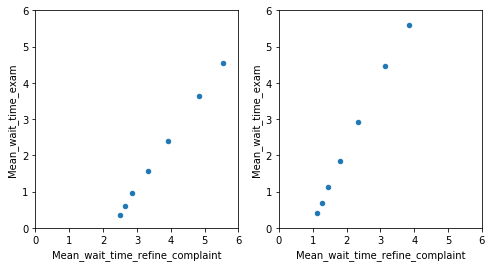

In [649]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8, 4))
df_staffing_10209.groupby('Offload')[fs_steps].mean().plot.scatter(x = 'Mean_wait_time_refine_complaint', y = 'Mean_wait_time_exam', ax = ax1)
df_staffing_10219.groupby('Offload')[fs_steps].mean().plot.scatter(x = 'Mean_wait_time_refine_complaint', y = 'Mean_wait_time_exam', ax = ax2)
ax1.set_xlim(0, 6)
ax1.set_ylim(0, 6)
ax2.set_xlim(0, 6)
ax2.set_ylim(0, 6)

In [650]:
fs_work_time = ['Mean_wait_time_refine_complaint', 'Mean_serve_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_serve_time_exam_flow_staff', 'Mean_serve_time_follow_up']

In [651]:
fs_workpath = data.groupby(['Offload', 'Staffing'])[fs_work_time].mean()

In [652]:
fs_workpath.columns = ['RC_Wait', 'RC_Serve', 'Ex_Wait', 'Ex_Serve', 'FU_Serve']

In [653]:
fs_workpath['Total'] = fs_workpath.sum(axis = 1)

In [654]:
fs_workpath

RC_Wait  RC_Serve  Ex_Wait  Ex_Serve  FU_Serve  Total
Offload Staffing                                                       
0.0     10-20-9      5.55     24.50     4.56     29.04      5.24  68.89
        10-21-9      3.84     24.54     5.61     29.06      5.24  68.29
        10-22-9      2.56     24.56     6.53     29.04      5.24  67.93
0.05    10-20-9      4.83     24.50     3.65     29.05      5.25  67.28
        10-21-9      3.15     24.54     4.48     29.06      5.25  66.48
        10-22-9      1.99     24.57     5.24     29.07      5.25  66.11
0.1     10-20-9      3.92     24.53     2.41     29.03      5.25  65.14
        10-21-9      2.32     24.55     2.92     29.04      5.24  64.09
        10-22-9      1.33     24.59     3.37     29.06      5.24  63.60
0.15    10-20-9      3.32     24.53     1.58     29.07      5.25  63.75
        10-21-9      1.79     24.56     1.86     29.06      5.24  62.51
        10-22-9       nan       nan      nan       nan       nan   0.00
0.2     10-20-9      2.87     24.52     0.97     29.04      5.24  62.65
        10-21-9      1.46     24.58     1.12     29.07      5.24  61.48
        10-22-9       nan       nan      nan       nan       nan   0.00
0.25    10-20-9      2.64     24.53     0.61     29.06      5.25  62.10
        10-21-9      1.27     24.58     0.69     29.06      5.25  60.85
        10-22-9       nan       nan      nan       nan       nan   0.00
0.3     10-20-9      2.49     24.55     0.37     29.06      5.25  61.71
        10-21-9      1.13     24.58     0.40     29.06      5.25  60.43
        10-22-9       nan       nan      nan       nan       nan   0.00
Control 10-20-9      0.00     24.67     9.04       nan      5.24  38.95
        10-21-9      0.00     24.67     8.88       nan      5.24  38.79
        10-22-9      0.00     24.66     8.89       nan      5.25  38.80

In [655]:
waits_mean = data.groupby(['Staffing', 'Offload'])[['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam']].mean()
waits_95 = data.groupby(['Staffing', 'Offload'])[['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam']].quantile(0.95)
waits_05 = data.groupby(['Staffing', 'Offload'])[['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam']].quantile(0.05)

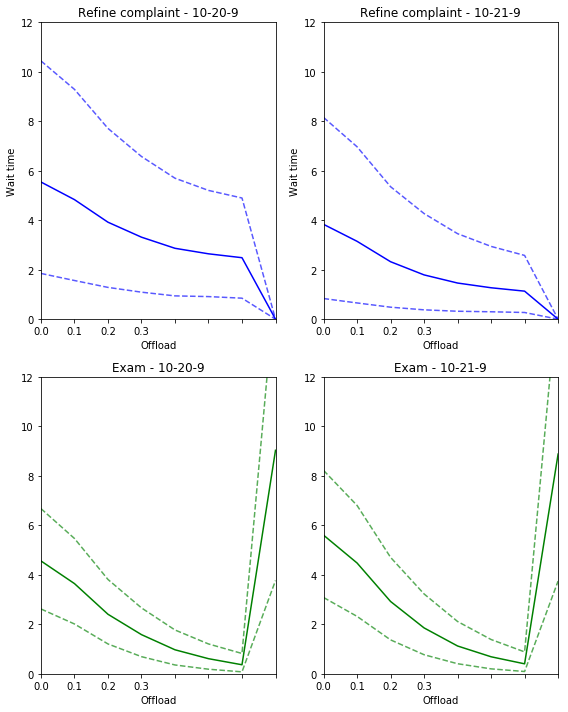

In [656]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize = (8, 10), ncols = 2, nrows = 2)
# 10-20-9
staff_10209 = '10-20-9'
waits_mean.loc[staff_10209]['Mean_wait_time_refine_complaint'].plot(ax = ax1, color = 'b')
waits_95.loc[staff_10209]['Mean_wait_time_refine_complaint'].plot(ax = ax1, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_05.loc[staff_10209]['Mean_wait_time_refine_complaint'].plot(ax = ax1, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_mean.loc[staff_10209]['Mean_wait_time_exam'].plot(ax = ax3, color = 'g')
waits_95.loc[staff_10209]['Mean_wait_time_exam'].plot(ax = ax3, label = None, ls = '--', color = 'g', alpha = 0.65)
waits_05.loc[staff_10209]['Mean_wait_time_exam'].plot(ax = ax3, label = None, ls = '--', color = 'g', alpha = 0.65)
ax1.set_ylim(0, 12)
ax3.set_ylim(0, 12)
ax1.set_ylabel('Wait time')
ax1.set_title('Refine complaint - ' + staff_10209)
ax3.set_title('Exam - ' + staff_10209)
# 10-21-9
staff_10219 = '10-21-9'
waits_mean.loc[staff_10219]['Mean_wait_time_refine_complaint'].plot(ax = ax2, color = 'b')
waits_95.loc[staff_10219]['Mean_wait_time_refine_complaint'].plot(ax = ax2, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_05.loc[staff_10219]['Mean_wait_time_refine_complaint'].plot(ax = ax2, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_mean.loc[staff_10219]['Mean_wait_time_exam'].plot(ax = ax4, color = 'g')
waits_95.loc[staff_10219]['Mean_wait_time_exam'].plot(ax = ax4, label = None, ls = '--', color = 'g', alpha = 0.65)
waits_05.loc[staff_10219]['Mean_wait_time_exam'].plot(ax = ax4, label = None, ls = '--', color = 'g', alpha = 0.65)
ax2.set_ylim(0, 12)
ax4.set_ylim(0, 12)
ax2.set_ylabel('Wait time')
ax2.set_title('Refine complaint - ' + staff_10219)
ax4.set_title('Exam - ' + staff_10219)
plt.tight_layout()
plt.show()

In [657]:
patient_journey = ['Mean_wait_time_check_in', 'Mean_serve_time_check_in', 'Mean_wait_time_refine_complaint', 'Mean_serve_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_serve_time_exam_flow_staff', 'Mean_wait_time_follow_up', 'Mean_serve_time_follow_up','Mean_wait_time_checkout', 'Mean_serve_time_checkout']

In [658]:
control_journey = ['Mean_wait_time_check_in', 'Mean_serve_time_check_in', 'Mean_wait_time_refine_complaint', 'Mean_serve_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_serve_time_exam', 'Mean_wait_time_follow_up', 'Mean_serve_time_follow_up','Mean_wait_time_checkout', 'Mean_serve_time_checkout']

In [659]:
df_patient_journey = data.groupby(['Staffing', 'Offload'])[patient_journey].mean().T

In [660]:
df_patient_journey.loc['Total_time'] = df_patient_journey.sum()

In [661]:
df_patient_journey

Staffing                         10-20-9                                      \
Offload                              0.0  0.05   0.1  0.15   0.2  0.25   0.3   
Mean_wait_time_check_in             0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Mean_serve_time_check_in            2.51  2.51  2.51  2.51  2.51  2.51  2.51   
Mean_wait_time_refine_complaint     5.55  4.83  3.92  3.32  2.87  2.64  2.49   
Mean_serve_time_refine_complaint   24.50 24.50 24.53 24.53 24.52 24.53 24.55   
Mean_wait_time_exam                 4.56  3.65  2.41  1.58  0.97  0.61  0.37   
Mean_serve_time_exam_flow_staff    29.04 29.05 29.03 29.07 29.04 29.06 29.06   
Mean_wait_time_follow_up            0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Mean_serve_time_follow_up           5.24  5.25  5.25  5.25  5.24  5.25  5.25   
Mean_wait_time_checkout             0.01  0.01  0.01  0.01  0.01  0.02  0.02   
Mean_serve_time_checkout            5.37  5.37  5.37  5.37  5.37  5.37  5.37   
Total_time                         76.77 75.18 73.04 71.64 70.55 70.00 69.62   

Staffing                                 10-21-9        ...                \
Offload                          Control     0.0  0.05  ...   0.3 Control   
Mean_wait_time_check_in             0.00    0.00  0.00  ...  0.00    0.00   
Mean_serve_time_check_in            2.51    2.51  2.51  ...  2.51    2.51   
Mean_wait_time_refine_complaint     0.00    3.84  3.15  ...  1.13    0.00   
Mean_serve_time_refine_complaint   24.67   24.54 24.54  ... 24.58   24.67   
Mean_wait_time_exam                 9.04    5.61  4.48  ...  0.40    8.88   
Mean_serve_time_exam_flow_staff      nan   29.06 29.06  ... 29.06     nan   
Mean_wait_time_follow_up            0.00    0.00  0.00  ...  0.00    0.00   
Mean_serve_time_follow_up           5.24    5.24  5.25  ...  5.25    5.24   
Mean_wait_time_checkout             0.01    0.01  0.01  ...  0.02    0.01   
Mean_serve_time_checkout            5.37    5.37  5.37  ...  5.37    5.37   
Total_time                         46.84   76.18 74.37  ... 68.33   46.68   

Staffing                         10-22-9                                  \
Offload                              0.0  0.05   0.1 0.15  0.2 0.25  0.3   
Mean_wait_time_check_in             0.00  0.00  0.00  nan  nan  nan  nan   
Mean_serve_time_check_in            2.51  2.51  2.51  nan  nan  nan  nan   
Mean_wait_time_refine_complaint     2.56  1.99  1.33  nan  nan  nan  nan   
Mean_serve_time_refine_complaint   24.56 24.57 24.59  nan  nan  nan  nan   
Mean_wait_time_exam                 6.53  5.24  3.37  nan  nan  nan  nan   
Mean_serve_time_exam_flow_staff    29.04 29.07 29.06  nan  nan  nan  nan   
Mean_wait_time_follow_up            0.00  0.00  0.00  nan  nan  nan  nan   
Mean_serve_time_follow_up           5.24  5.25  5.24  nan  nan  nan  nan   
Mean_wait_time_checkout             0.01  0.01  0.01  nan  nan  nan  nan   
Mean_serve_time_checkout            5.37  5.37  5.38  nan  nan  nan  nan   
Total_time                         75.82 74.00 71.50 0.00 0.00 0.00 0.00   

Staffing                                  
Offload                          Control  
Mean_wait_time_check_in             0.00  
Mean_serve_time_check_in            2.51  
Mean_wait_time_refine_complaint     0.00  
Mean_serve_time_refine_complaint   24.66  
Mean_wait_time_exam                 8.89  
Mean_serve_time_exam_flow_staff      nan  
Mean_wait_time_follow_up            0.00  
Mean_serve_time_follow_up           5.25  
Mean_wait_time_checkout             0.01  
Mean_serve_time_checkout            5.37  
Total_time                         46.68  

[11 rows x 24 columns]

In [662]:
data.loc[data['Offload'] == 'Control']['Total_system_time'].mean()

75.79276097499697

In [663]:
data.loc[data['Offload'] == 'Control'][control_journey].mean().sum()

75.79276097493775